In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [15]:
df = pd.read_csv("iris.csv")

In [16]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [17]:
X_standard = X - X.mean(axis=0)
print("Shape of X_standard:", X_standard.shape)

Shape of X_standard: (150, 4)


In [18]:
cov_matrix = np.cov(X_standard.T)
print("Covariance matrix:\n", cov_matrix)

Covariance matrix:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [19]:
eigenvalues, eigenvectors = LA.eig(cov_matrix)

In [20]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [21]:
n_components = 2
eigenvector_subset = sorted_eigenvectors[:, :n_components]

In [22]:
X_reduced = np.dot(X_standard, eigenvector_subset)
print("Transformed data shape (X_reduced):", X_reduced.shape)

Transformed data shape (X_reduced): (150, 2)


In [23]:
variance_pc1 = (sorted_eigenvalues[0] / sum(sorted_eigenvalues)) * 100
print(f"Variance explained by PC1: {variance_pc1:.2f}%")

Variance explained by PC1: 92.46%


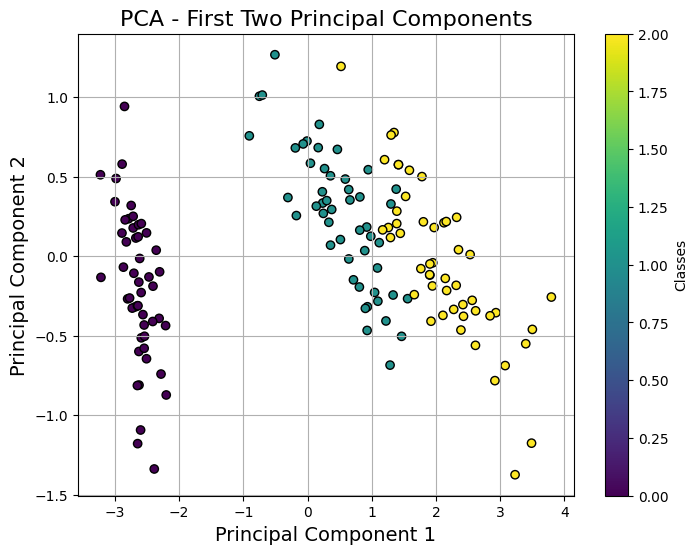

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=pd.factorize(Y)[0], cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.title("PCA - First Two Principal Components", fontsize=16)
plt.colorbar(label="Classes")
plt.grid(True)
plt.show()